#### Assignment 1 - Moushumi Pardesi

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_pickle(r'data_set 1.zip')
df.head()

,data
0,0.205676
1,0.575321
2,1.346189
3,-2.107491
4,0.237493


In [11]:
data = df['data'].values.reshape(-1, 1)
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)
means = gmm.means_
variances = gmm.covariances_
weights = gmm.weights_
x = np.linspace(data.min(), data.max(), 1000)
pdf_values = np.zeros_like(x)

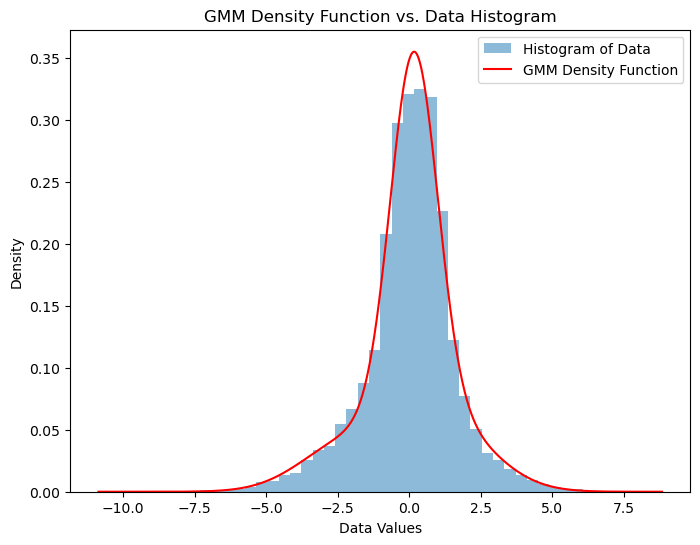

In [12]:
for i in range(n_components):
    pdf_values += weights[i] * norm.pdf(x, loc=means[i, 0], scale=np.sqrt(variances[i, 0, 0]))

#plot 
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=True, alpha=0.5, label='Histogram of Data')
plt.plot(x, pdf_values, 'r', label='GMM Density Function')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.title('GMM Density Function vs. Data Histogram')
plt.show()

Checking model fit

In [20]:
from scipy.stats import ks_2samp
data = data.flatten()
pdf_values = pdf_values.flatten()

#Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(data, pdf_values)
print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'P-Value: {p_value}')

Kolmogorov-Smirnov Statistic: 0.45855
P-Value: 1.3743022412217229e-183


Based on the KS statistic, there is some difference between the observed data and the density function.
p value is very small and almost 0 which is strong proof against null hypothesis, which means the data and model distribution are not the same.

Visual inspection tells me that the model is a fairly decent fit however, it shows very high density at 0 which isn't really the case as per the actual data. This is maybe why the KS test gives out a a not-so-good fit number.